<a href="https://colab.research.google.com/github/KrishChothani/AI_ML/blob/main/ML_PRACTICAL_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("IRIS.csv")
display(df.head())

possible_species_cols = [c for c in df.columns if 'species' in c.lower() or 'class' in c.lower() or 'variety' in c.lower()]
species_col = possible_species_cols[0] if possible_species_cols else ("Species" if "Species" in df.columns else None)

if species_col is None:
    raise RuntimeError("No species/class column found in the CSV. Columns: " + ", ".join(df.columns))
def find_col_like(df, keywords):
    for col in df.columns:
        low = col.lower()
        if all(k in low for k in keywords):
            return col
    return None

sepal_len_col = find_col_like(df, ["sepal", "length"]) or find_col_like(df, ["sepal", "len"]) or df.columns[0]
sepal_wid_col = find_col_like(df, ["sepal", "width"]) or find_col_like(df, ["sepal", "wid"]) or df.columns[1]

petal_len_col = find_col_like(df, ["petal", "length"]) or find_col_like(df, ["petal", "len"]) or df.columns[2]
petal_wid_col = find_col_like(df, ["petal", "width"]) or find_col_like(df, ["petal", "wid"]) or df.columns[3]

feature_cols = [sepal_len_col, sepal_wid_col, petal_len_col, petal_wid_col]
feature_cols = [c for c in feature_cols if c is not None and c != species_col]

df = df.dropna(subset=feature_cols + [species_col]).reset_index(drop=True)
labels, uniques = pd.factorize(df[species_col])
df['label'] = labels

X = df[feature_cols].astype(float).values
y = df['label'].values

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print('Feature columns used:', feature_cols)
print('Classes found:', list(uniques))

Feature columns used: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Classes found: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


print('\n=== scikit-learn SVC ===')
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test, y_pred_svc)


print('SVC test accuracy:', acc_svc)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_svc))


=== scikit-learn SVC ===
SVC test accuracy: 0.9473684210526315
Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]


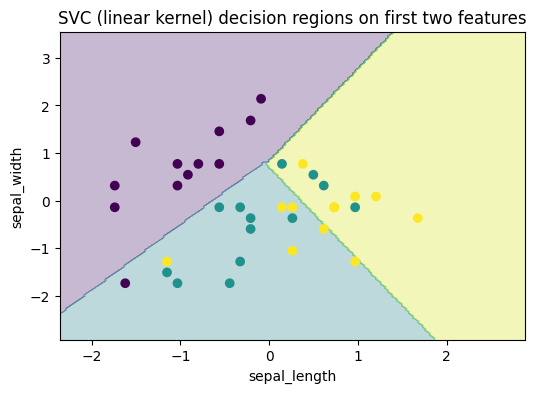


=== scikit-learn SVR ===
SVR MSE: 0.14018600922247645 R2: 0.8071098219855581


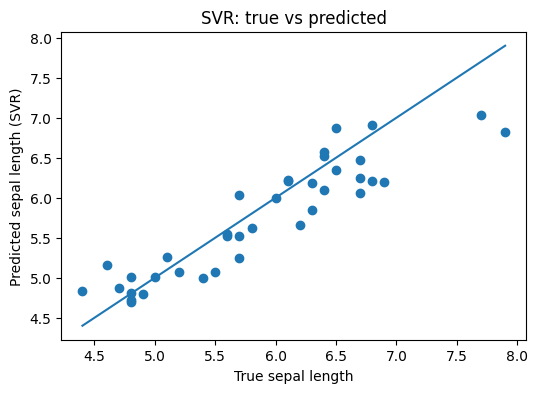

In [8]:
X_vis = X[:, :2]
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vis, y, test_size=0.25, random_state=42, stratify=y)
scaler_vis = StandardScaler().fit(Xv_train)
Xv_train_s = scaler_vis.transform(Xv_train)
Xv_test_s = scaler_vis.transform(Xv_test)
svc_lin = SVC(kernel='linear', random_state=42).fit(Xv_train_s, yv_train)
fig = plt.figure(figsize=(6,4))
xx, yy = np.meshgrid(np.linspace(Xv_train_s[:,0].min()-0.5, Xv_train_s[:,0].max()+0.5, 200),
                     np.linspace(Xv_train_s[:,1].min()-0.5, Xv_train_s[:,1].max()+0.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc_lin.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(Xv_test_s[:,0], Xv_test_s[:,1], c=yv_test)
plt.title('SVC (linear kernel) decision regions on first two features')
plt.xlabel(feature_cols[0])
plt.ylabel(feature_cols[1])
plt.show()
target_idx = 0
X_reg = np.delete(X, target_idx, axis=1)
y_reg = X[:, target_idx]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
scaler_r = StandardScaler().fit(Xr_train)
Xr_train_s = scaler_r.transform(Xr_train)
Xr_test_s = scaler_r.transform(Xr_test)
print('\n=== scikit-learn SVR ===')
svr = SVR(kernel='rbf')
svr.fit(Xr_train_s, yr_train)
yr_pred_svr = svr.predict(Xr_test_s)
mse_svr = mean_squared_error(yr_test, yr_pred_svr)
r2_svr = r2_score(yr_test, yr_pred_svr)
print('SVR MSE:', mse_svr, 'R2:', r2_svr)
fig = plt.figure(figsize=(6,4))
plt.scatter(yr_test, yr_pred_svr)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()])
plt.xlabel('True sepal length')
plt.ylabel('Predicted sepal length (SVR)')
plt.title('SVR: true vs predicted')
plt.show()


In [11]:

############################################################ scikit-learn SVR #############################################################
svr = SVR(kernel='rbf')
svr.fit(Xr_train_s, yr_train)
yr_pred_svr = svr.predict(Xr_test_s)
mse_svr = mean_squared_error(yr_test, yr_pred_svr)
r2_svr = r2_score(yr_test, yr_pred_svr)


SVR MSE: 0.14018600922247645 R2: 0.8071098219855581


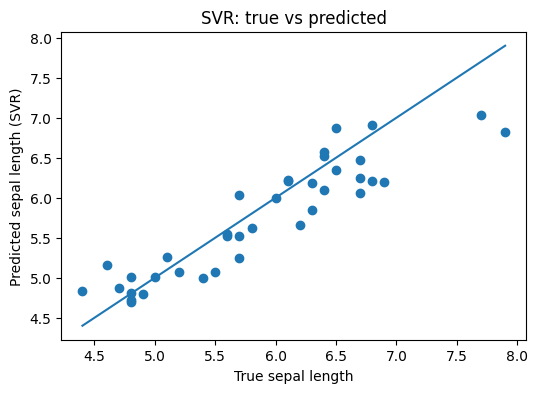

In [12]:
print('SVR MSE:', mse_svr, 'R2:', r2_svr)
fig = plt.figure(figsize=(6,4))
plt.scatter(yr_test, yr_pred_svr)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()])
plt.xlabel('True sepal length')
plt.ylabel('Predicted sepal length (SVR)')
plt.title('SVR: true vs predicted')
plt.show()


In [13]:
class SimpleScaler:
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.scale_[self.scale_ == 0] = 1.0
    def transform(self, X):
        return (X - self.mean_) / self.scale_
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [14]:
class LinearSVMBinary:
    def __init__(self, lr=0.01, C=1.0, epochs=200):
        self.lr = lr
        self.C = C
        self.epochs = epochs
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        for epoch in range(self.epochs):
            idx = np.random.permutation(n_samples)
            for i in idx:
                xi = X[i]
                yi = y[i]
                margin = yi * (np.dot(self.w, xi) + self.b)
                if margin >= 1:
                    grad_w = (2.0 / self.C) * self.w
                    grad_b = 0.0
                else:
                    grad_w = (2.0 / self.C) * self.w - yi * xi
                    grad_b = -yi
                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b
        return self
    def decision_function(self, X):
        return X.dot(self.w) + self.b
    def predict(self, X):
        return np.where(self.decision_function(X) >= 0, 1, -1)


In [15]:
class LinearSVM_OVR:
    def __init__(self, lr=0.01, C=1.0, epochs=200):
        self.lr = lr
        self.C = C
        self.epochs = epochs
        self.models = {}
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.scaler = SimpleScaler()
        Xs = self.scaler.fit_transform(X)
        for cls in self.classes_:
            y_bin = np.where(y == cls, 1, -1)
            model = LinearSVMBinary(lr=self.lr, C=self.C, epochs=self.epochs)
            model.fit(Xs, y_bin)
            self.models[cls] = model
        return self
    def predict(self, X):
        Xs = self.scaler.transform(X)
        scores = np.column_stack([self.models[c].decision_function(Xs) for c in self.classes_])
        preds = self.classes_[np.argmax(scores, axis=1)]
        return preds

In [16]:
class LinearSVR_SGD:
    def __init__(self, lr=0.01, C=1.0, epsilon=0.1, epochs=200):
        self.lr = lr
        self.C = C
        self.epsilon = epsilon
        self.epochs = epochs
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.scaler = SimpleScaler()
        Xs = self.scaler.fit_transform(X)
        self.w = np.zeros(n_features)
        self.b = 0.0
        for epoch in range(self.epochs):
            idx = np.random.permutation(n_samples)
            for i in idx:
                xi = Xs[i]
                yi = y[i]
                y_pred = np.dot(self.w, xi) + self.b
                diff = y_pred - yi
                if diff > self.epsilon:
                    grad_w = (2.0 / self.C) * self.w + 1.0 * xi
                    grad_b = 1.0
                elif diff < -self.epsilon:
                    grad_w = (2.0 / self.C) * self.w - 1.0 * xi
                    grad_b = -1.0
                else:
                    grad_w = (2.0 / self.C) * self.w
                    grad_b = 0.0
                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b
        return self
    def predict(self, X):
        Xs = self.scaler.transform(X)
        return Xs.dot(self.w) + self.b


In [17]:
print('\n=== Training custom Linear SVM (OVR) on full features ===')
svm_custom = LinearSVM_OVR(lr=0.01, C=1.0, epochs=300)
svm_custom.fit(X_train, y_train)
y_pred_custom = svm_custom.predict(X_test)
acc_custom = np.mean(y_pred_custom == y_test)
print('Custom Linear SVM test accuracy:', acc_custom)


=== Training custom Linear SVM (OVR) on full features ===
Custom Linear SVM test accuracy: 0.6578947368421053


In [20]:
def cmatrix(true, pred, classes):
    k = len(classes)
    cm = np.zeros((k,k), dtype=int)
    for t,p in zip(true, pred):
        i = np.where(classes==t)[0][0]
        j = np.where(classes==p)[0][0]
        cm[i,j] += 1
    return cm

print('Confusion matrix (custom):\n', cmatrix(y_test, y_pred_custom, svm_custom.classes_))
print('\n=== Training custom Linear SVM (OVR) on first two features for visualization ===')
svm_custom_2d = LinearSVM_OVR(lr=0.01, C=1.0, epochs=300)
svm_custom_2d.fit(Xv_train, yv_train)
yv_pred_custom = svm_custom_2d.predict(Xv_test)
acc_custom_2d = np.mean(yv_pred_custom == yv_test)
print('Custom (2D) SVM test accuracy:', acc_custom_2d)
fig = plt.figure(figsize=(6,4))


Confusion matrix (custom):
 [[12  0  0]
 [ 8  1  4]
 [ 1  0 12]]

=== Training custom Linear SVM (OVR) on first two features for visualization ===
Custom (2D) SVM test accuracy: 0.6578947368421053


<Figure size 600x400 with 0 Axes>

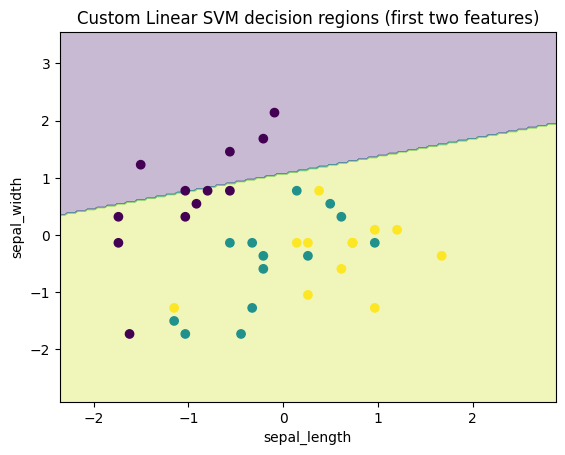

In [21]:
xx2, yy2 = np.meshgrid(np.linspace(Xv_train_s[:,0].min()-0.5, Xv_train_s[:,0].max()+0.5, 200),
                       np.linspace(Xv_train_s[:,1].min()-0.5, Xv_train_s[:,1].max()+0.5, 200))
grid2 = np.c_[xx2.ravel(), yy2.ravel()]
Z2 = svm_custom_2d.predict(grid2).reshape(xx2.shape)
plt.contourf(xx2, yy2, Z2, alpha=0.3)
plt.scatter(Xv_test_s[:,0], Xv_test_s[:,1], c=yv_test)
plt.title('Custom Linear SVM decision regions (first two features)')
plt.xlabel(feature_cols[0])
plt.ylabel(feature_cols[1])
plt.show()


In [23]:
################################################################### Training custom Linear SVR (SGD) #############################################3
svr_custom = LinearSVR_SGD(lr=0.01, C=1.0, epsilon=0.1, epochs=500)
svr_custom.fit(Xr_train, yr_train)
yr_pred_custom = svr_custom.predict(Xr_test)
mse_custom = np.mean((yr_pred_custom - yr_test)**2)
ss_res = np.sum((yr_test - yr_pred_custom)**2)
ss_tot = np.sum((yr_test - yr_test.mean())**2)
r2_custom = 1 - ss_res/ss_tot


Custom SVR MSE: 0.2318157860616331 R2: 0.6810310209414473


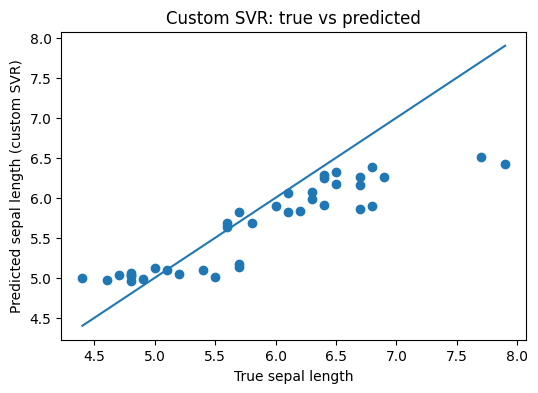

,model,task,metric,value
0,SVC (sklearn),classification,accuracy,0.947368
1,Linear SVM (custom),classification,accuracy,0.657895
2,SVR (sklearn),regression,MSE,0.140186
3,Linear SVR (custom),regression,MSE,0.231816



Finished. The script ran scikit-learn SVC/SVR and simple custom linear SVM/SVR implementations in Colab.


In [24]:
print('Custom SVR MSE:', mse_custom, 'R2:', r2_custom)
fig = plt.figure(figsize=(6,4))
plt.scatter(yr_test, yr_pred_custom)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()])
plt.xlabel('True sepal length')
plt.ylabel('Predicted sepal length (custom SVR)')
plt.title('Custom SVR: true vs predicted')
plt.show()
summary = pd.DataFrame({
    'model': ['SVC (sklearn)', 'Linear SVM (custom)', 'SVR (sklearn)', 'Linear SVR (custom)'],
    'task': ['classification', 'classification', 'regression', 'regression'],
    'metric': ['accuracy', 'accuracy', 'MSE', 'MSE'],
    'value': [acc_svc, acc_custom, mse_svr, mse_custom]
})

display(summary)

print('\nFinished. The script ran scikit-learn SVC/SVR and simple custom linear SVM/SVR implementations in Colab.')